# Fase 2 - Sistema dinámico SIR ampliado
## Ian Galicia
## Matricula: A01781528

## El modelo SIR

Consideremos un modelo para describir la dinámica de un grupo de individuos de una población con exposición a una enfermedad que puede contagiarse entre los miembros de la población. Esto puede modelarse como un sistema dinámico denominado $SIR$ para una población de $N$ individuos en la que se considera la interacción entre un conjunto de $S$ individuos *suceptibles* de contraer la enfermedad, un conjunto $I$ de individuos *infectados* y uno conjunto $R$ de individuos *recuperados* de la enfermedad.

Este modelo tiene los siguientes supuestos:

* la probabilidades de infectarse son iguales para todos los individuos de la población;

* la población es homogénea, es decir que los riesgos de infectarse son iguales para todos los suceptibles y que los tiempos para recuperarse son iguales para todos los infectados; y

* el tamaño $N$ de la población es constante.

El modelo maneja los diferentes conjuntos $S$, $I$ y $R$ como si fueran compartimentos bien separados y considera que los individuos pueden pasar de uno a otro en el caso de que se enfermen (cambio $S\rightarrow I$) o que una vez enfermos se recuperen (cambio $I\rightarrow R$). Ademas, se asume que un individuo no puede pasar del conjunto de suceptibles directamente al conjunto de recuperados.

Con estos supuestos y consideraciones, las ecuaciones diferenciales del modelo SIR son:

\begin{aligned}
\frac{dS}{dt}&= -\beta \frac{I}{N} S\\
\frac{dI}{dt}&= \beta\frac{I}{N}S-\gamma I\\\
\frac{dR}{dt}&= \gamma I
\end{aligned}

donde:

* N=S+R+I

* la cantidad $\beta\frac{I}{N}$ representa la razón con que las personas salen del compartimento S (se infectan);

* en la primera ecuación $dS$ representa el cambio debido a las personas que salen del compartimento $S$ (el signo negativo se debe a que las personas salen)

* en la segunda ecuación $dI$ representa el cambio debido a las personas que salen del compartimento $I$ (una parte se debe a las personas que del compartimento $S$ pasan al compartimento $I$, y otra parte se debe a las personas que salen del compartimento $I$ porque se recuperan);

* la cantidad $\gamma$ representa la razón con que las personas se recuperan.


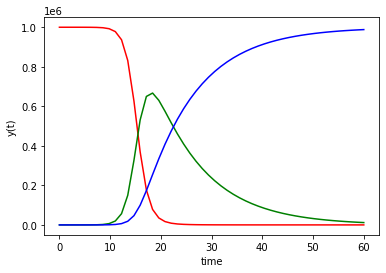

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

beta = 1
gamma = 0.1
#S = 999999
#I= 1
#R=0

# function that returns dy/dt
def model(y,t,beta,gamma):
  
  S, I, R = y
  N = S+I+R 
  lamb = beta * I/N
  dS = -lamb * S               
  dI = lamb * S - gamma * I   
  dR = gamma * I             
  return dS,dI,dR

# initial condition
y0 =  np.array([999999, 1, 0])  #S=999999, I = 1, R=0 

# time points
t = np.linspace(0,60)

# solve ODE
y = odeint(model,y0,t,args=(beta, gamma))

# plot results
plt.plot(t,y.T[0],color='red')
plt.plot(t,y.T[1],color='green')
plt.plot(t,y.T[2],color='blue')

plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

Con el modelo SIR se define la constante 
$R_0=\frac{\beta}{\gamma}$
que representa el número de personas que cada contagiado infecta. Para que la enfermedad analizada logre dispararse en forma de una epidemia debe cumplirse que $R_0 > 1$. 

También se define 
$R_{eff}=R_0\frac{S}{N}$
que corresponde al número promedio de personas que cada contagiado infecta. Este segundo valor $R_{eff}$ toma en cuenta de que durante la evolución de la pandemia, al aumentar del número de personas inmunes en la población cada persona contagiada infectará a un número de personas cada vez menor.



## Pregunta 1

Haga cambios en el modelo para tomar en cuenta el hecho de que la población no es constante:

* agregar un término de incremento en $dS$ para tomar en cuenta los individuos nacidos $+bN$

* agregar un término de decremento en $dS$ para tomar en cuenta las personas susceptibles que mueren -$\mu S$

* agregar un término de decremento en $dI$ para tomar en cuenta las personas infectadas que mueren -$\mu I$

* agregar un término de decremento en $dR$ para tomar en cuenta las personas recuperadas que fallecen $-\mu R$

Usar ahora los parámetros

\begin{aligned}
\beta  &=  0.4 days^{-1} &= (0.4 \times 365) years^{-1}\\
\gamma &=  0.2 days^{-1} &= (0.2 \times 365) years^{-1}\\
\mu    &=  \frac{1}{70}years^{-1}\\
b     &=  \frac{1}{70}years^{-1}\\
\end{aligned}

y considerar una duración de 1 año.

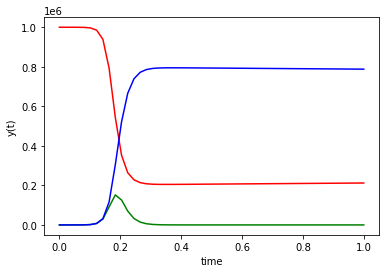

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

beta = 0.4 * 365
gamma = 0.2 * 365
b = 1/70
mu = 1/70

#S = 999999
#I= 1
#R=0

# function that returns dy/dt
def model(y,t,beta,gamma,b,mu):
    
    S, I, R = y
    N = S+I+R 
    lamb = beta * I/N
    dS = -lamb * S + b * N - mu * S           
    dI = lamb * S - gamma * I - mu * I
    dR = gamma * I - mu * R
    
    return dS,dI,dR

# initial condition
y0 =  np.array([999999, 1, 0])  #S=999999, I = 1, R=0 

# time points
t = np.linspace(0,1)

# solve ODE
y = odeint(model,y0,t,args=(beta, gamma, b, mu))

# plot results
plt.plot(t,y.T[0],color='red')
plt.plot(t,y.T[1],color='green')
plt.plot(t,y.T[2],color='blue')

plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

## Pregunta 2

Considerando el modelo SIR básico, haga cambios para tomar en cuenta un programa de vacunación. Suponga que una fracción $v$ de susceptibles se vacuna de manera que queda inmune (y entra ahora directamente en el conjunto de los recuperados). Calcule la dinámica de la epidemia en este caso usando los parámetros $\beta=0.4$, $\gamma=0.1$ y considere un periodo de 2 años.

Su modelo debe ser capaz de mostrar que si la fracción $v$ es suficiente, no es necesario vacunar a todos los suceptibles para evitar la epidemia. A este efecto se le conoce como *inmunidad de rebaño* y se refiere a que si un sector grande de la población es inmune, entonces los contagios se mantienen a un nivel en el que la enfermedad es eliminada.

¿Cómo se puede calcular la fracción mínima $v$ de personas que se deben vacunar para poder evitar una epidemia? La inmunidad de rebaño ocurre cuando $R_{eff}< 1$. 

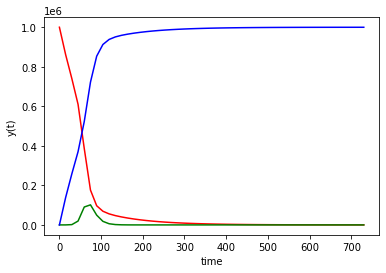

In [3]:
beta = 0.4
gamma = 0.1
delta = 0.01 # Se supone un coeficiente constante de velocidad de vacunación

#S = 999999
#I= 1
#R=0

# function that returns dy/dt
def model(y,t,beta,gamma):
    
    S, I, R = y
    N = S+I+R
    V = S * delta
    
    lamb = beta * I/N
    dS = -lamb * S - V 
    dI = lamb * S - gamma * I   
    dR = gamma * I + V
    
    return dS,dI,dR

# initial condition
y0 =  np.array([999999, 1, 0])  #S=999999, I = 1, R=0 

# time points
t = np.linspace(0,365*2)

# solve ODE
y = odeint(model,y0,t,args=(beta, gamma))

# plot results
plt.plot(t,y.T[0],color='red')
plt.plot(t,y.T[1],color='green')
plt.plot(t,y.T[2],color='blue')

plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

$R_{eff}=R_0\frac{S}{N}< 1$   para inmunidad de rebaño

$R_0<\frac{N}{S}$   con $R_0>1$ al haber una pandemia y con $N$ constante

con $\beta=0.4$, $\gamma=0.1$

$R_0=\frac{\beta}{\gamma}=\frac{0.4}{0.1}=4$

entonces $\frac{N}{S}>4$  

$S<\frac{N}{4}$  para llegar a la inmunidad de rebaño

$N-\frac{N}{4}=\frac{3N}{4}$ Deben de estar vacunadas

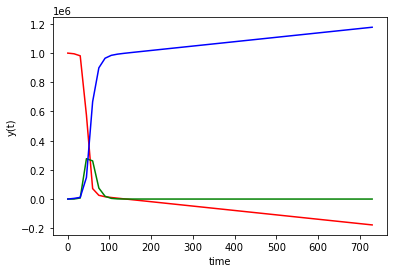

In [4]:
beta = 0.4
gamma = 0.1

#S = 999999
#I= 1
#R=0

# function that returns dy/dt
def model(y,t,beta,gamma):
    
    S, I, R = y
    N = S+I+R
    V = 300
    
    lamb = beta * I/N
    dS = -lamb * S - V 
    dI = lamb * S - gamma * I   
    dR = gamma * I + V
    
    return dS,dI,dR

# initial condition
y0 =  np.array([999999, 1, 0])  #S=999999, I = 1, R=0 

# time points
t = np.linspace(0,365*2)

# solve ODE
y = odeint(model,y0,t,args=(beta, gamma))

# plot results
plt.plot(t,y.T[0],color='red')
plt.plot(t,y.T[1],color='green')
plt.plot(t,y.T[2],color='blue')

plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

## Pregunta 3

Haga cambios en el modelo para tomar en cuenta de que la población no es constante:

* agregar un término de incremento en $dS$ para tomar en cuenta los nacidos $+bN$

* agregar un término de decremento en $dS$ para tomar en cuenta las personas susceptibles que mueren -$\mu S$

* agregar un término de decremento en $dI$ para tomar en cuenta las personas infectadas que mueren -$\mu I$

* agregar un término de decremento en $dR$ para tomar en cuenta las personas recuperadas que fallecen $-\mu R$

Use los parámetros

\begin{aligned}
\beta  &=  0.4 days^{-1} &= (0.4 \times 365) years^{-1}\\
\gamma &=  0.2 days^{-1} &= (0.2 \times 365) years^{-1}\\
\mu    &=  \frac{1}{70}years^{-1}\\
b     &=  \frac{1}{70}years^{-1}\\
\end{aligned}

y considere una duración de 400 años en sus cálculos.

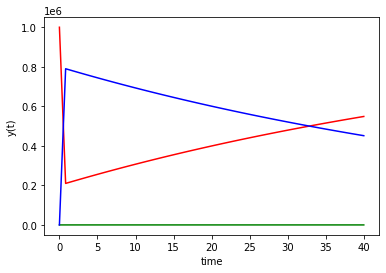

In [5]:
beta = 0.4 * 365
gamma = 0.2 * 365
b = 1/70
mu = 1/70

#S = 999999
#I= 1
#R=0

# function that returns dy/dt
def model(y,t,beta,gamma,b,mu):
    
    S, I, R = y
    N = S+I+R 
    lamb = beta * I/N
    dS = -lamb * S + b * N - mu * S           
    dI = lamb * S - gamma * I - mu * I
    dR = gamma * I - mu * R
    
    return dS,dI,dR

# initial condition
y0 =  np.array([999999, 1, 0])  #S=999999, I = 1, R=0 

# time points
t = np.linspace(0,40)

# solve ODE
y = odeint(model,y0,t,args=(beta, gamma, b, mu))

# plot results
plt.plot(t,y.T[0],color='red')
plt.plot(t,y.T[1],color='green')
plt.plot(t,y.T[2],color='blue')

plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

## Pregunta 4

Considerando el modelo SIR básico, haga cambios para tomar en cuenta un programa de vacunación. Suponga que una fracción $v$ de susceptibles se vacuna de manera que queda inmune (y entra ahora directamente en el conjunto de los recuperados), mientras que la fracción $(1-v)$ sigue siendo susceptible. 

Calcule la dinámica de la epidemia en este caso, estudiando cómo cambia la dinámica variando la fracción $v$. Utilice $\beta=0.6$, $\gamma=0.1$ y considere un periodo de 2 años.

Su modelo debe ser capaz de mostrar que si la fracción $v$ es suficiente, no es necesario vacunar a todos los suceptibles para evitar la epidemia. A este efecto se le conoce como *inmunidad de rebaño* y se refiere a que si un sector grande de la población es inmune, entonces los contagios se mantienen a un nivel en el que la enfermedad es eliminada.

¿Cómo se puede calcular la fracción mínima $v$ de personas que se deben vacunar para poder evitar una epidemia? La inmunidad de rebaño ocurre cuando $R_{eff}< 1$. 

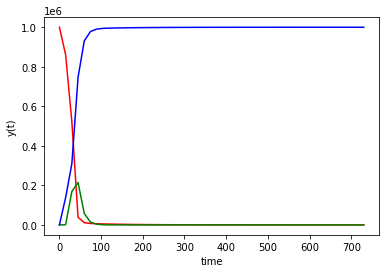

In [6]:
beta = 0.6
gamma = 0.1
delta = 0.01 # Se supone un coeficiente constante de velocidad de vacunación

#S = 999999
#I= 1
#R=0

# function that returns dy/dt
def model(y,t,beta,gamma):
    
    S, I, R = y
    N = S+I+R
    V = S * delta
    
    lamb = beta * I/N
    dS = -lamb * S - V 
    dI = lamb * S - gamma * I   
    dR = gamma * I + V
    
    return dS,dI,dR

# initial condition
y0 =  np.array([999999, 1, 0])  #S=999999, I = 1, R=0 

# time points
t = np.linspace(0,365*2)

# solve ODE
y = odeint(model,y0,t,args=(beta, gamma))

# plot results
plt.plot(t,y.T[0],color='red')
plt.plot(t,y.T[1],color='green')
plt.plot(t,y.T[2],color='blue')

plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

$R_{eff}=R_0\frac{S}{N}< 1$   para inmunidad de rebaño

$R_0<\frac{N}{S}$   con $R_0>1$ al haber una pandemia y con $N$ constante

con $\beta=0.6$, $\gamma=0.1$

$R_0=\frac{\beta}{\gamma}=\frac{0.6}{0.1}=6$

entonces $\frac{N}{S}>6$  

$S<\frac{N}{6}$  al llegar a la inmunidad de rebaño

$N-\frac{N}{6}=\frac{5N}{6}$ Deben de estar vacunadas